# Evaluation
This notebook contains code to produce the plots and visualisations necessary for Assignment 3.

In [1]:
from models import *

import pandas as pd
import numpy as np

from fashionmnist_utils.mnist_reader import load_mnist

import matplotlib.pyplot as plt
import seaborn as sns
from trainers import *
from networks import *
import tensorflow as tf

C:\Users\jisho\Anaconda3\envs\iaml\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jisho\Anaconda3\envs\iaml\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jisho\Anaconda3\envs\iaml\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jisho\Anaconda3\envs\iaml\lib\site-packages\te

## Load models

In [2]:
models = {
    'CNN_8_16_300_RMS_0.0': PyTorchTrainer.load('models/task3_3_1_CNN_8_16_300_RMS_0.0.pkl'),
    'CNN_8_16_300_RMS_0.25': PyTorchTrainer.load('models/task3_3_1_CNN_8_16_300_RMS_0.25.pkl'),
    'CNN_8_16_300_RMS_0.5': PyTorchTrainer.load('models/task3_3_1_CNN_8_16_300_RMS_0.5.pkl'),
    'CNN_8_16_300_RMS_0.75': PyTorchTrainer.load('models/task3_3_1_CNN_8_16_300_RMS_0.75.pkl'),
    'CNN_8_16_300_RMS_1.0': PyTorchTrainer.load('models/task3_3_1_CNN_8_16_300_RMS_1.0.pkl'),
}

## Perform evaluation
The following code evaluates each model loaded in `models`:

In [3]:
loggers = {k: v.evaluate() for k, v in models.items()}

## Define classes for the dataset

In [4]:
classes = [
    't-shirt',
    'trouser',
    'pullover',
    'dress',
    'coat',
    'sandal',
    'shirt',
    'sneaker',
    'bag',
    'ankle boot'
]

[None, None, None, None, None]

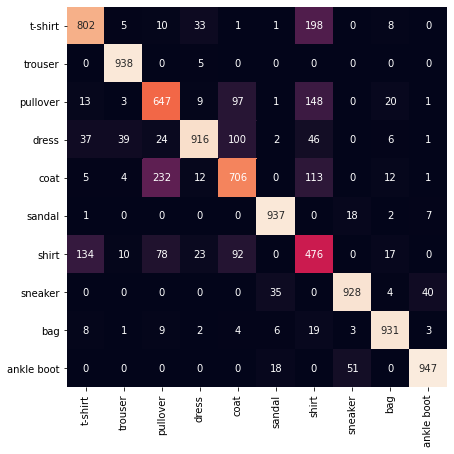

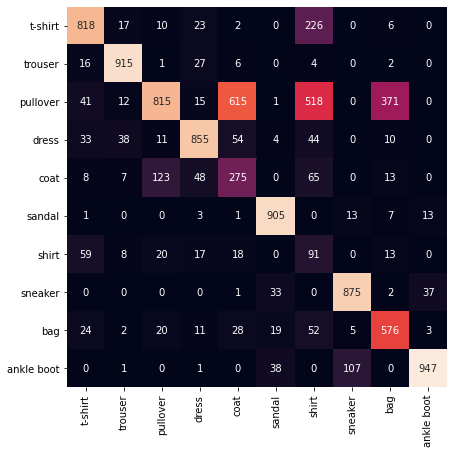

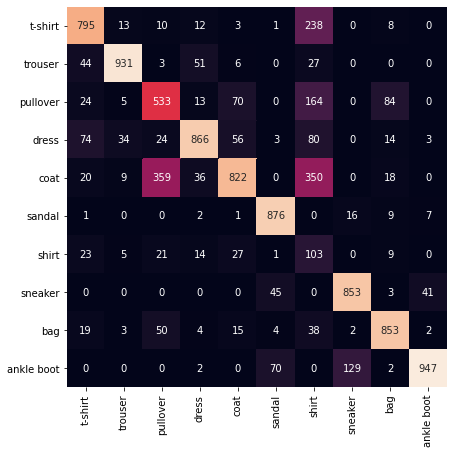

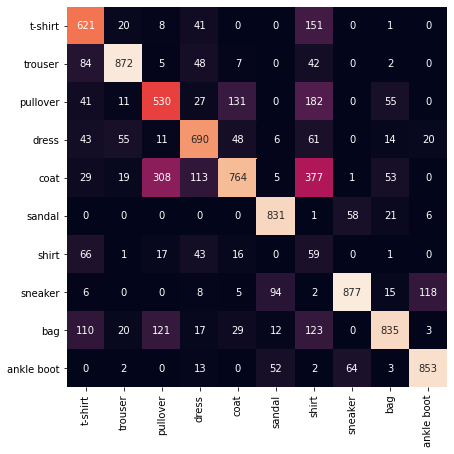

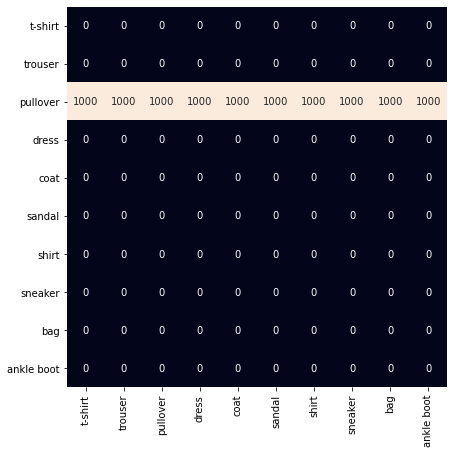

In [5]:
def saveConfusion(index, path):
    fig = plt.figure(figsize=(7, 7))
    sns.heatmap(loggers[index].mat, annot=True, fmt='.0f', cbar=False, xticklabels=classes, yticklabels=classes, square=True)
    fig.savefig(path)

[saveConfusion(k, 'imgPytorch/confusion_'+k+'.pdf') for k, v in loggers.items()]

# Plots

## Accuracy
The following code creates a bar plot for the accuracy of each loaded model:

[8.688489968321013, 7.46779303062302, 8.003167898627243, 8.126611957796014, inf]


C:\Users\jisho\Desktop\git\ImmageAnnalysisAndMachineLearning_exam\Exam_A3\exercise_A3_code\metrics.py:57: RuntimeWarning: divide by zero encountered in double_scalars
  return subDiag/sumDiv


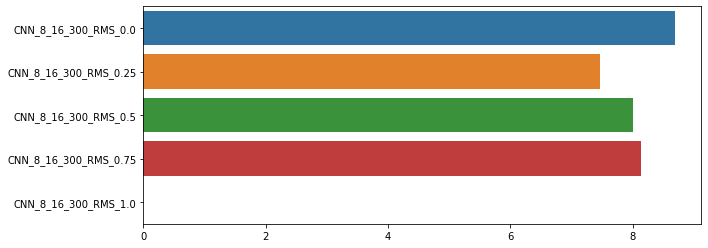

In [6]:
acc = [l.accuracy for l in loggers.values()]
print (acc)
plt.figure(figsize=(10, 4))
sns.barplot(y=list(models.keys()), x=acc)

## Precision and recall
The following code creates a bar plot showing the precision/recall for each class and model loaded:

[8.228, 7.072, 7.579, 6.9319999999999995, 1.0]


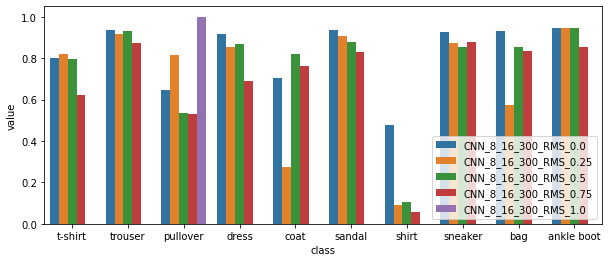

In [7]:
ps = {k: v.precision for k, v in loggers.items()}
ps = {'class': classes, **ps}

print([sum(v.precision) for k, v in loggers.items()])
df = pd.DataFrame(ps)
df = df.melt(id_vars='class')

plt.figure(figsize=(10, 4))
sns.barplot(x='class', y='value', hue='variable', data=df)
plt.legend(loc='lower right')

[8.217024600497826, 7.280532890935976, 7.5278804736146085, 6.784634956495022, 0.1]


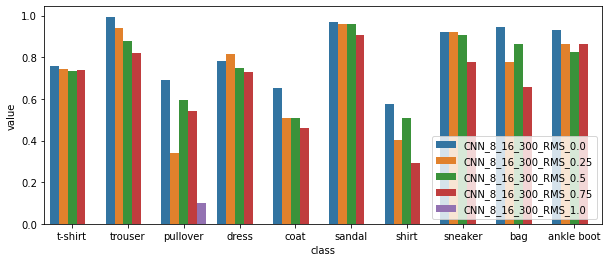

In [8]:
ps = {k: v.recall for k, v in loggers.items()}
print([sum(v.recall) for k, v in loggers.items()])
ps = {'class': classes, **ps}

df = pd.DataFrame(ps)
df = df.melt(id_vars='class')

plt.figure(figsize=(10, 4))
sns.barplot(x='class', y='value', hue='variable', data=df)
plt.legend(loc='lower right')

# Image samples
The following is code to generate sample image grids. This is very useful for visualising samples together with the prediction and label:

In [9]:
X_train, y_train = load_mnist('data/FashionMNIST/raw', kind='train')
X_test, y_test = load_mnist('data/FashionMNIST/raw', kind='t10k')

def show_samples(X, y, num, prediction=None, sort=True, cols=32, width_mul=1):
    if prediction is None:
        height_mul = 1
    else:
        height_mul = 2
        
    if sort: 
        idx = np.argsort(y[:num])
        X = X[idx]
        if prediction is not None:
            prediction = prediction[idx]
    fig, ax = plt.subplots(nrows=num//cols, ncols=cols, figsize=(width_mul*cols, height_mul*num//cols))
    for i in range(num):
        ax[i//cols, i%cols].axis('off')
        ax[i//cols, i%cols].imshow(X[i].reshape((28, 28)), cmap='gray')
        if prediction is not None:
            ax[i//cols, i%cols].set_title(f'{classes[prediction[i]]}/{classes[y[i]]}')

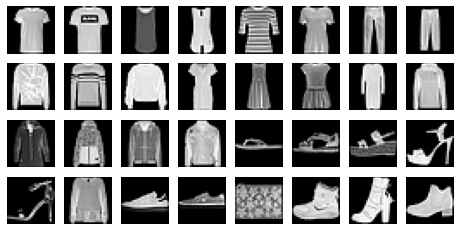

In [10]:
show_samples(X_train, y_train, 32, cols=8)

In [11]:
def predictTest(key, path):
    print(X_test[0].reshape(28,28).shape)
    X = [tf.convert_to_tensor(x.reshape(28,28)) for x in X_test]
    p = [models[key].model(x).argmax(dim=1) for x in X]

    #wrong = y_test != p

    X = X_test#[wrong]
    p = p#[wrong]
    y = y_test#[wrongsd]

    show_samples(X, y, 32, prediction=p, cols=8, sort=False, width_mul=2)
    plt.tight_layout()
    plt.savefig(path)

[predictTest(k, 'imgPytorch/result_'+k+'.pdf') for k, v in loggers.items()]

(28, 28)


TypeError: conv2d(): argument 'input' (position 1) must be Tensor, not Tensor

In [ ]:
#For creating the pdfs
# note doesn't save graphs

[saveConfusion(k, 'imgPytorch/confusion_'+k+'.pdf') for k, v in loggers.items()]
[predictTest(k, 'imgPytorch/result_'+k+'.pdf') for k, v in loggers.items()]